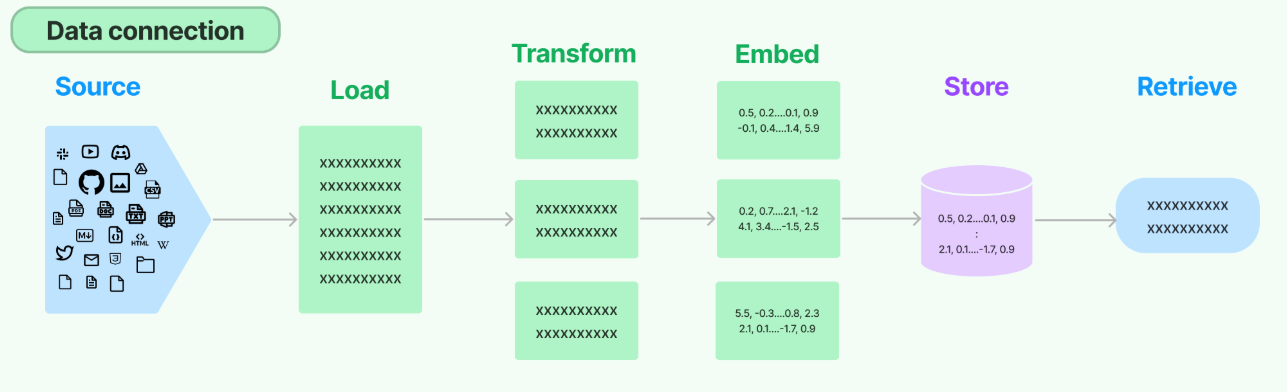

In [1]:
!pip install langchain
!pip install openai
!pip install faiss-cpu
!pip install tiktoken
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.1 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
import os
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

#Vector Store

In [4]:
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings
from langchain.docstore.document import Document

# Sample documents
documents = [Document(page_content="Generative AI is a type of artificial intelligence that can create new content, like text, images, music, audio, and videos, based on patterns learned from large datasets, rather than simply analyzing existing data.")]

# Create embeddings
embeddings = OpenAIEmbeddings(openai_api_key = OPENAI_API_KEY)

# Build a FAISS vector store
vector_store = FAISS.from_documents(documents, embeddings)


In [5]:
# Query the vector store
query_result = vector_store.similarity_search("What is Generative AI?", k=1)

In [6]:
print("Relevant Document:", query_result[0].page_content)

Relevant Document: Generative AI is a type of artificial intelligence that can create new content, like text, images, music, audio, and videos, based on patterns learned from large datasets, rather than simply analyzing existing data.


#Database Connections - SQLite

In [8]:
!pip install langchain_experimental

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 6.3 MB/s eta 0:00:00


In [9]:
from langchain.sql_database import SQLDatabase
from langchain_experimental.sql import SQLDatabaseChain # Import from langchain_experimental
from langchain.llms import OpenAI

In [10]:
# Connect to SQLite database
db = SQLDatabase.from_uri("sqlite:///example.db")

# Initialize LLM and chain
llm = OpenAI(temperature=0)
db_chain = SQLDatabaseChain(llm=llm, database=db)

<ipython-input-10-ef4347dd856f>:5: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAI``.
  llm = OpenAI(temperature=0)
/usr/local/lib/python3.11/dist-packages/langchain_experimental/sql/base.py:77: UserWarning: Directly instantiating an SQLDatabaseChain with an llm is deprecated. Please instantiate with llm_chain argument or using the from_llm class method.
  warnings.warn(


In [12]:
result = db_chain.run("SELECT name FROM sqlite_master WHERE type='table';")

In [13]:
result

'"artists", "albums", "media_types", "genres", "playlists", "playlist_track", "tracks"'

#Dataframe Connections

In [26]:
!pip install langchain-experimental

In [28]:
import pandas as pd
from langchain.llms import OpenAI
from langchain_experimental.agents import create_pandas_dataframe_agent

# Load a sample DataFrame
df = pd.DataFrame({
    "Product": ["A", "B", "C"],
    "Sales": [100, 200, 300]
})

# Create an agent to interact with the DataFrame
llm = OpenAI(openai_api_key = OPENAI_API_KEY)



In [30]:
agent = create_pandas_dataframe_agent(llm, df, allow_dangerous_code=True)

In [31]:
# Query the DataFrame
response = agent.run("What is the total sales?")

In [41]:
print("DataFrame Query Result:", response)

DataFrame Query Result: 600
